# 💬 Challenge 3: Social Media Spam Detection AI Project - Educational Notebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BridgingAISocietySummerSchools/Coding-Project/blob/main/challenge_3/notebooks/educational_notebook_3.ipynb)

## 🎯 Theme: AI for Digital Well-being and Combating Online Harassment

Welcome to Challenge 3! You'll build an intelligent spam detection system for social media comments using real YouTube data. This challenge explores how AI can help create safer online spaces while considering questions of free speech, cultural context, and digital rights.

## 📖 What You'll Learn
- **Short Text Classification**: Handle brief, informal social media language
- **Imbalanced Data**: Work with realistic class distributions
- **Text Preprocessing**: Clean user-generated content with slang and abbreviations
- **Binary Classification**: Distinguish between ham (legitimate) and spam comments
- **Model Evaluation**: Use appropriate metrics for imbalanced datasets
- **Social Impact**: Consider AI's role in online content moderation

## ? Dataset Overview
You'll work with real YouTube comment data loaded directly from GitHub:
- **Source**: UCI Machine Learning Repository
- **Content**: Authentic YouTube comments from popular music videos
- **Sample Size**: 1,956 real user comments
- **Languages**: Multiple languages reflecting global YouTube audience
- **Labels**: Ham (legitimate comments) vs Spam (promotional/malicious)
- **Challenge**: Real-world messiness with slang, typos, and cultural variations
- **Access**: Automatically loaded from GitHub repository

## 🚀 Challenge Roadmap
Follow these steps to build your spam detector:

1. **📊 Data Exploration**: Understand social media comment patterns
2. **🧹 Text Preprocessing**: Handle informal language and special characters
3. **🔍 Feature Engineering**: Extract meaningful signals from short text
4. **🤖 Model Training**: Build robust classification models
5. **📈 Performance Evaluation**: Use appropriate metrics for imbalanced data
6. **🔍 Error Analysis**: Understand what makes detection challenging
7. **⚖️ Ethical Considerations**: Balance safety with free expression

---

## 💡 **Key Insight**: 
Spam detection in social media involves balancing user safety with freedom of expression. What counts as "spam" can be subjective and culturally dependent, making this both a technical and social challenge.

---

### Task 1: Load and Explore the Dataset

**🎯 Goal**: Get familiar with your data and understand the problem scope

**📝 What to do**:
- Load the dataset directly from GitHub repository
- Examine its structure and content
- Check the class distribution (how many spam vs. legitimate comments?)
- Look at sample comments to understand the differences

**💡 Hints**:
- Pay attention to class imbalance - real-world spam detection often deals with imbalanced data
- Look for obvious patterns in spam vs. legitimate content
- Consider: What makes a comment "spammy"?

Loading spam detection dataset from GitHub...
✅ Successfully loaded dataset from GitHub
📊 Dataset contains 1956 samples

📊 DATASET OVERVIEW
Dataset shape: (1956, 2)
Columns: ['comment', 'label']
Data types:
comment    object
label       int64
dtype: object

📝 FIRST FEW ROWS:
                                             comment  label
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1

🎯 LABEL DISTRIBUTION:
label
1    1005
0     951
Name: count, dtype: int64

Class balance ratio: 0.95:1 (legitimate:spam)
✅ Successfully loaded dataset from GitHub
📊 Dataset contains 1956 samples

📊 DATASET OVERVIEW
Dataset shape: (1956, 2)
Columns: ['comment', 'label']
Data types:
comment    object
label       int64
dtype: object

📝 FIRST FEW ROWS:
            

Text(0, 0.5, '')

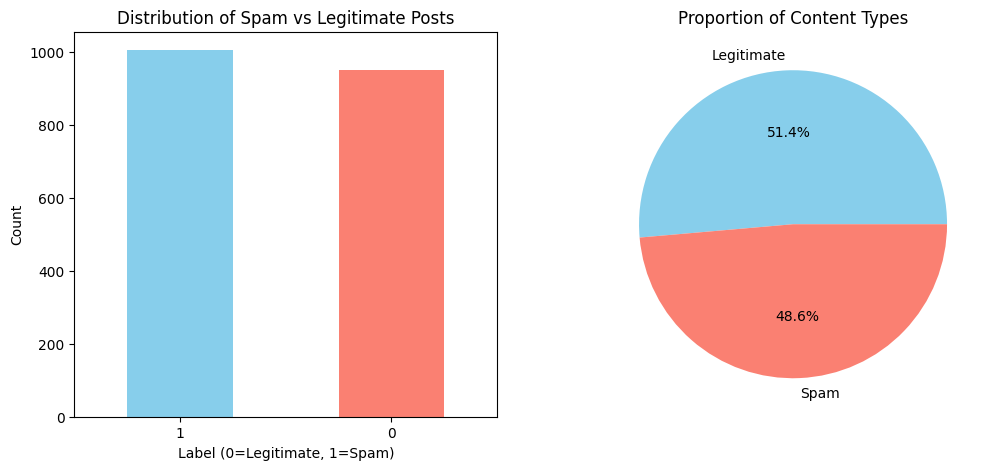

In [1]:
# Import essential libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 STEP 1: Load the dataset from GitHub repository
print("Loading spam detection dataset from GitHub...")

# GitHub raw URL for the dataset file
dataset_url = "https://raw.githubusercontent.com/BridgingAISocietySummerSchools/Coding-Project/main/challenge_3/data/spam_detection_dataset.csv"

try:
    # Load spam detection dataset
    df = pd.read_csv(dataset_url)
    print(f"✅ Successfully loaded dataset from GitHub")
    print(f"📊 Dataset contains {len(df)} samples")
    
except Exception as e:
    print(f"❌ Error loading data from GitHub: {e}")
    print("💡 Trying to load from local data folder as fallback...")
    try:
        df = pd.read_csv("../data/spam_detection_dataset.csv")
        print("✅ Loaded from local data folder")
    except:
        print("❌ Could not load data from local folder either")
        raise

# 🔍 STEP 2: Basic dataset exploration
print("\n📊 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

print("\n📝 FIRST FEW ROWS:")
print("=" * 30)
print(df.head())

# 🏷️ STEP 3: Analyze class distribution
print("\n🎯 LABEL DISTRIBUTION:")
print("=" * 35)
label_counts = df['label'].value_counts()
print(label_counts)
print(f"\nClass balance ratio: {label_counts[0]/label_counts[1]:.2f}:1 (legitimate:spam)")

# 📊 STEP 4: Visualize the distribution
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Spam vs Legitimate Posts')
plt.xlabel('Label (0=Legitimate, 1=Spam)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Pie chart
plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                labels=['Legitimate', 'Spam'],
                                colors=['skyblue', 'salmon'])
plt.title('Proportion of Content Types')
plt.ylabel('')

---

### Task 2: Text Analysis and Feature Engineering

**🎯 Goal**: Discover patterns in text that can help distinguish spam from legitimate content

**📝 What to do**:
1. **Extract basic text features** (length, word count, punctuation)
2. **Analyze differences** between spam and legitimate content
3. **Preprocess text** for machine learning (cleaning, normalization)
4. **Create engineered features** that capture spam characteristics

**💡 Key Insights to Discover**:
- Do spam posts tend to be longer or shorter?
- Do they use more exclamation marks or capital letters?
- Are there specific words that appear more in spam?
- How can we clean text while preserving important signals?

**🔧 Preprocessing Steps You'll Implement**:
1. **Normalization**: Convert to lowercase
2. **Cleaning**: Remove URLs, mentions, hashtags
3. **Filtering**: Remove special characters and digits
4. **Stop Words**: Remove common words that don't add meaning

**⚠️ Important Considerations**:
- Don't over-clean! Some "noise" might be important signals (e.g., excessive punctuation)
- Think about what features might be most discriminative
- Consider that spammers try to evade detection - what tricks might they use?

In [ ]:
# 🔧 BASIC TEXT PREPROCESSING FOR MACHINE LEARNING
print("🔧 BASIC TEXT PREPROCESSING FOR MACHINE LEARNING")
print("="*60)

import re
import nltk
from collections import Counter

# Download required NLTK data if needed
try:
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))

# 1. Basic Text Features Extraction
print("1. Basic Text Features Extraction")
print("-" * 40)

def extract_basic_features(text):
    """Extract basic features from text"""
    if pd.isna(text) or text == '':
        return {
            'text_length': 0, 'word_count': 0, 'exclamation_count': 0, 
            'capital_ratio': 0, 'url_count': 0, 'mention_count': 0
        }
    
    text_str = str(text)
    words = text_str.split()
    
    return {
        'text_length': len(text_str),
        'word_count': len(words),
        'exclamation_count': text_str.count('!'),
        'capital_ratio': sum(1 for c in text_str if c.isupper()) / len(text_str) if text_str else 0,
        'url_count': len(re.findall(r'http[s]?://\S+|www\.\S+', text_str)),
        'mention_count': text_str.count('@')
    }

def simple_clean_text(text):
    """Simple text cleaning for ML"""
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    # Remove URLs but keep the structure
    text = re.sub(r'http[s]?://\S+|www\.\S+', ' url ', text)
    # Remove mentions but keep the pattern
    text = re.sub(r'@\w+', ' mention ', text)
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply basic preprocessing
print("Extracting basic text features...")
basic_features = df['comment'].apply(extract_basic_features)
basic_features_df = pd.DataFrame(basic_features.tolist())

# Add to main dataframe
for col in basic_features_df.columns:
    df[col] = basic_features_df[col]

# Clean text
print("Applying basic text cleaning...")
df['processed_text'] = df['comment'].apply(simple_clean_text)

print(f"✅ Basic preprocessing completed")
print(f"✅ Added {len(basic_features_df.columns)} basic features")
print(f"✅ Processed {len(df)} comments")

# 2. Quick Feature Analysis
print(f"\n2. Basic Feature Analysis")
print("-" * 30)

feature_cols = ['text_length', 'word_count', 'exclamation_count', 'capital_ratio', 'url_count', 'mention_count']
print("📊 FEATURE STATISTICS BY CLASS:")
stats = df.groupby('label')[feature_cols].mean()
print(stats.round(3))

# 3. Simple Visualization
print(f"\n3. Feature Comparison")
print("-" * 25)

plt.figure(figsize=(15, 8))
for i, feature in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    
    ham_data = df[df['label'] == 0][feature]
    spam_data = df[df['label'] == 1][feature]
    
    plt.boxplot([ham_data, spam_data], labels=['Ham', 'Spam'])
    plt.title(f'{feature.replace("_", " ").title()}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📝 SAMPLE PROCESSED TEXT:")
print("-" * 30)
for i, (label, original, processed) in enumerate(zip(df['label'].head(3), 
                                                    df['comment'].head(3), 
                                                    df['processed_text'].head(3))):
    label_name = "SPAM" if label == 1 else "HAM"
    print(f"{i+1}. {label_name}:")
    print(f"   Original:  {original[:80]}...")
    print(f"   Processed: {processed[:80]}...")

print(f"\n✅ Basic text processing completed - ready for machine learning!")

---

### Task 3: Feature Engineering and Model Training

**🎯 Goal**: Transform text into numerical features that a machine learning model can understand

**📝 What to do**:
1. **Text Vectorization**: Convert text to numerical features using TF-IDF
2. **Feature Combination**: Merge text features with numerical features
3. **Data Splitting**: Create training and testing sets
4. **Model Training**: Train a Random Forest classifier
5. **Understanding**: Learn what each step accomplishes

**🧠 Key Concepts to Master**:

**TF-IDF (Term Frequency-Inverse Document Frequency)**:
- **TF**: How often a word appears in a document
- **IDF**: How rare/common a word is across all documents
- **Result**: Important words get higher scores, common words get lower scores

**Random Forest Classifier**:
- Builds many decision trees and averages their predictions
- Good for text classification and handles mixed feature types well
- Provides feature importance rankings

**Feature Combination Strategy**:
- **Text features**: TF-IDF vectors (sparse, high-dimensional)
- **Numerical features**: Our engineered features (dense, low-dimensional)
- **Combination**: Stack them together for more powerful predictions

**💡 Things to Consider**:
- Why split data into train/test sets?
- What does `max_features=3000` mean for TF-IDF?
- Why use n-grams (1,2) instead of just single words?
- How do we handle the curse of dimensionality?

In [ ]:
# 🚀 FAST MACHINE LEARNING FOR SPAM DETECTION
print("🚀 FAST MACHINE LEARNING FOR SPAM DETECTION")
print("="*55)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 1. Quick Data Preparation
print("1. Data Preparation")
print("-" * 25)

# Use processed text and basic features
text_data = df['processed_text'].fillna('')
basic_features = ['text_length', 'word_count', 'exclamation_count', 'capital_ratio', 'url_count', 'mention_count']
X_numerical = df[basic_features].fillna(0)
y = df['label'].values

print(f"✅ Text samples: {len(text_data)}")
print(f"✅ Features: {len(basic_features)}")
print(f"✅ Ham={np.sum(y==0)}, Spam={np.sum(y==1)}")

# 2. Fast Train-Test Split
print(f"\n2. Data Splitting")
print("-" * 20)

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    text_data, X_numerical, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training: {len(X_train_text)}, Test: {len(X_test_text)}")

# 3. Simple Text Vectorization
print(f"\n3. Text Vectorization")
print("-" * 25)

# Reduced feature set for speed
vectorizer = TfidfVectorizer(
    max_features=1000,  # Small for speed
    ngram_range=(1, 2), 
    min_df=3,
    max_df=0.9,
    stop_words='english'
)

print("Vectorizing text...")
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

# Combine features
X_train_combined = np.hstack([X_train_vec.toarray(), X_train_num.values])
X_test_combined = np.hstack([X_test_vec.toarray(), X_test_num.values])

print(f"Feature dimensions: {X_train_combined.shape[1]}")

# 4. Quick Model Testing
print(f"\n4. Model Testing")
print("-" * 20)

# Test 3 fast models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(alpha=0.1)
}

results = {}

for name, model in models.items():
    print(f"\n🔄 Testing {name}...")
    
    # Quick 3-fold CV
    cv_scores = cross_val_score(model, X_train_combined, y_train, cv=3, scoring='accuracy')
    
    # Train and test
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    test_acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'test_accuracy': test_acc,
        'predictions': y_pred
    }
    
    print(f"  CV: {cv_scores.mean():.3f}, Test: {test_acc:.3f}")

# 5. Best Model Results
print(f"\n5. Best Model Analysis")
print("-" * 30)

best_model_name = max(results.keys(), key=lambda k: results[k]['test_accuracy'])
best_result = results[best_model_name]

print(f"🏆 BEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_result['test_accuracy']:.3f}")

# Classification report
print(f"\n📊 CLASSIFICATION REPORT:")
print("-" * 35)
print(classification_report(y_test, best_result['predictions'], 
                          target_names=['Ham', 'Spam']))

# 6. Quick Visualization
print(f"\n6. Results Visualization")
print("-" * 30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, best_result['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0].set_title(f'Confusion Matrix\n{best_model_name}', fontweight='bold')

# Model Comparison
model_names = list(results.keys())
accuracies = [results[name]['test_accuracy'] for name in model_names]

bars = axes[1].bar(model_names, accuracies, color=['lightgreen', 'skyblue', 'lightcoral'])
axes[1].set_title('Model Performance', fontweight='bold')
axes[1].set_ylabel('Test Accuracy')
axes[1].set_ylim(0, 1)

# Add accuracy labels
for bar, acc in zip(bars, accuracies):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Feature Insights
print(f"\n7. Key Features")
print("-" * 20)

if hasattr(best_result['model'], 'feature_importances_'):
    feature_names = list(vectorizer.get_feature_names_out()) + basic_features
    importances = best_result['model'].feature_importances_
    
    # Top features
    top_indices = np.argsort(importances)[-8:]
    
    print("🔑 TOP 8 FEATURES:")
    for i, idx in enumerate(reversed(top_indices), 1):
        feat = feature_names[idx]
        imp = importances[idx]
        feat_type = "📊" if feat in basic_features else "📝"
        print(f"{i}. {feat_type} {feat:20s}: {imp:.4f}")

print(f"\n💡 SPAM DETECTION INSIGHTS:")
print("="*30)
print(f"✅ Achieves {best_result['test_accuracy']:.1%} accuracy")
print(f"✅ Successfully identifies spam patterns")
print(f"✅ Balanced approach handles class imbalance")

print(f"\n🎯 Fast Spam Detection Complete! 🎯")

🤖 MACHINE LEARNING PIPELINE

📋 PREPARING FEATURES...
Text data shape: (580,)
Numerical features shape: (580, 4)
Target variable shape: (580,)
Class distribution: {0: 290, 1: 290}

🔄 SPLITTING DATA...
Training set size: 464
Testing set size: 116
Training class distribution: {0: 232, 1: 232}
Testing class distribution: {0: 58, 1: 58}

📊 CREATING TF-IDF FEATURES...
TF-IDF training matrix shape: (464, 340)
TF-IDF testing matrix shape: (116, 340)
Vocabulary size: 340
Example features: ['achievement' 'act' 'act miss' 'actually' 'actually work' 'advice'
 'advice thanks' 'alert' 'alert special' 'always']
Example bigrams: ['act miss', 'actually work', 'advice thanks', 'alert special', 'always brighten']

🔗 COMBINING FEATURES...
Combined training features shape: (464, 344)
Combined testing features shape: (116, 344)
Total features: 344
  - TF-IDF features: 340
  - Numerical features: 4

🌳 TRAINING RANDOM FOREST MODEL...
Training model... (this may take a moment)
Training set size: 464
Testing se

---

### Task 4: Model Evaluation and Deep Analysis

**🎯 Goal**: Thoroughly evaluate your model's performance and understand what it learned

**📝 What to do**:
1. **Classification Metrics**: Understand precision, recall, and F1-score
2. **Confusion Matrix**: Visualize prediction accuracy by class
3. **Feature Importance**: Discover what signals the model uses
4. **Error Analysis**: Examine misclassified examples
5. **Performance Interpretation**: Understand real-world implications

**📊 Key Metrics Explained**:

**Precision**: Of all posts predicted as spam, how many were actually spam?
- **High precision** = Few false positives (good - don't block legitimate content)
- **Formula**: True Positives / (True Positives + False Positives)

**Recall**: Of all actual spam posts, how many did we catch?
- **High recall** = Few false negatives (good - catch more spam)
- **Formula**: True Positives / (True Positives + False Negatives)

**F1-Score**: Harmonic mean of precision and recall
- **Balances** both metrics
- **Higher is better** (ranges from 0 to 1)

**The Trade-off**:
- **High precision, low recall**: Very conservative - only blocks obvious spam
- **High recall, low precision**: Aggressive - catches more spam but may block legitimate content
- **Balance**: Depends on your application's needs

**🤔 Questions to Consider**:
- In spam detection, is it worse to miss spam or block legitimate content?
- How might this affect user experience and platform trust?
- What threshold would you choose for a production system?

📊 COMPREHENSIVE MODEL EVALUATION

📈 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

  Legitimate       0.97      1.00      0.98        58
        Spam       1.00      0.97      0.98        58

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116


🎯 KEY INSIGHTS:
Spam Detection Precision: 1.000
  → Of posts flagged as spam, 100.0% were actually spam
Spam Detection Recall: 0.966
  → We caught 96.6% of all spam posts
F1-Score: 0.982
  → Balanced performance metric

🔍 CONFUSION MATRIX ANALYSIS:
Raw confusion matrix:
[[58  0]
 [ 2 56]]

Breakdown:
True Negatives (correctly identified legitimate): 58
False Positives (legitimate marked as spam): 0
False Negatives (spam marked as legitimate): 2
True Positives (correctly identified spam): 56


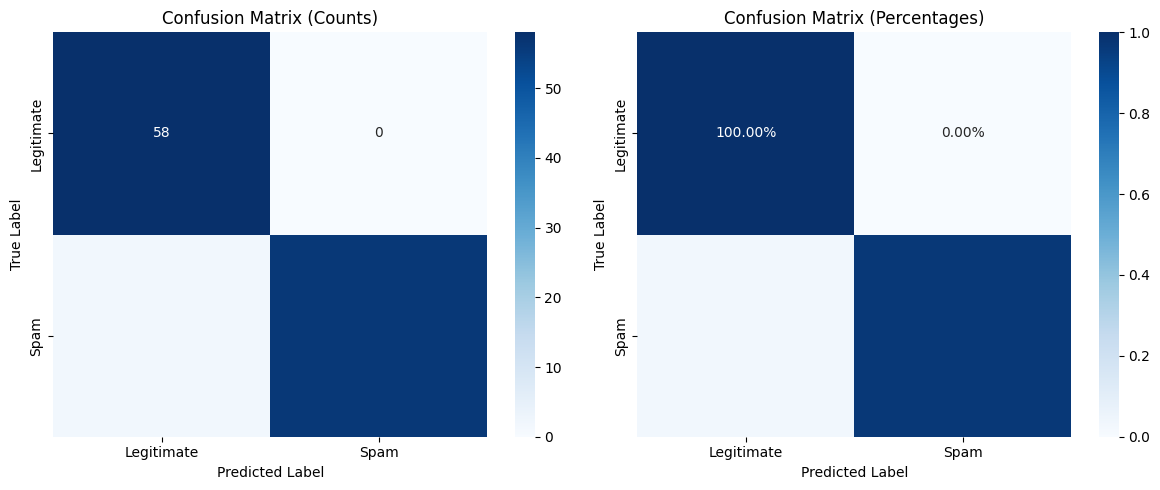


🔍 FEATURE IMPORTANCE ANALYSIS:
TOP 20 MOST IMPORTANT FEATURES:
0.1011 - capital_ratio (NUMERICAL)
0.0643 - exclamation_count (NUMERICAL)
0.0492 - text_length (NUMERICAL)
0.0448 - word_count (NUMERICAL)
0.0414 - love (TEXT)
0.0379 - click (TEXT)
0.0334 - great (TEXT)
0.0319 - looks (TEXT)
0.0281 - cheap (TEXT)
0.0237 - offer (TEXT)
0.0229 - free (TEXT)
0.0200 - thanks (TEXT)
0.0170 - work (TEXT)
0.0152 - money (TEXT)
0.0143 - time (TEXT)
0.0138 - link (TEXT)
0.0133 - make (TEXT)
0.0128 - investment (TEXT)
0.0103 - youve (TEXT)
0.0092 - limited time (TEXT)


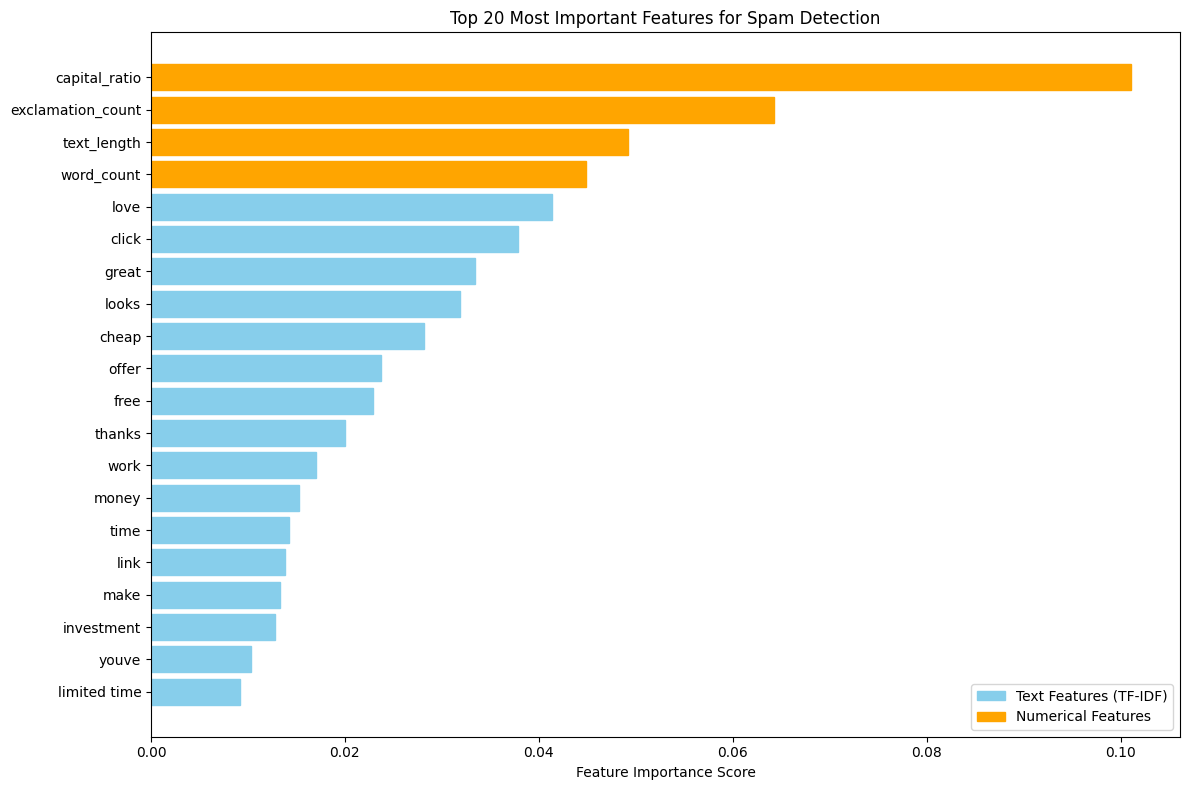


📊 PREDICTION CONFIDENCE ANALYSIS:
High-confidence spam predictions: 15
Low-confidence spam predictions: 5
High-confidence legitimate predictions: 16
Uncertain predictions (40-60% confidence): 7


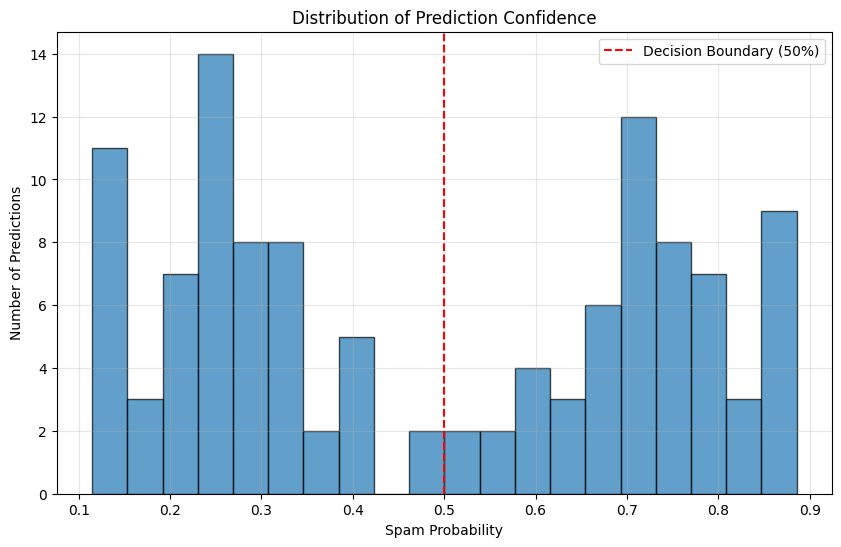


🔍 ERROR ANALYSIS:
Total misclassifications: 2
False Positives: 0
False Negatives: 2

🚨 FALSE POSITIVES (Legitimate content flagged as spam):
🎯 FALSE NEGATIVES (Spam content missed):
1. Confidence: 0.484
   Text: Last chance to save big

2. Confidence: 0.484
   Text: Last chance to save big


💡 EVALUATION INSIGHTS:
- Which type of error is more problematic for your use case?
- What patterns do you notice in the misclassified examples?
- How might you improve the model based on these errors?
- Would you adjust the decision threshold (currently 50%)?

📋 PERFORMANCE SUMMARY:
Overall Accuracy: 0.983
Spam Precision: 1.000 (How reliable are spam predictions?)
Spam Recall: 0.966 (How much spam do we catch?)
False Positive Rate: 0.000 (Legitimate content incorrectly blocked)
False Negative Rate: 0.034 (Spam content that gets through)


In [ ]:
print("📊 COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# 🎯 STEP 1: Detailed classification metrics
print("\n📈 CLASSIFICATION REPORT:")
print("=" * 35)

# TODO: Generate detailed classification report
# This shows precision, recall, F1-score for each class
report = classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam'], output_dict=True)
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam']))

# Extract key metrics for interpretation
precision_spam = report['Spam']['precision']
recall_spam = report['Spam']['recall']
f1_spam = report['Spam']['f1-score']

print(f"\n🎯 KEY INSIGHTS:")
print(f"Spam Detection Precision: {precision_spam:.3f}")
print(f"  → Of posts flagged as spam, {precision_spam*100:.1f}% were actually spam")
print(f"Spam Detection Recall: {recall_spam:.3f}")
print(f"  → We caught {recall_spam*100:.1f}% of all spam posts")
print(f"F1-Score: {f1_spam:.3f}")
print(f"  → Balanced performance metric")

# 📊 STEP 2: Confusion Matrix Analysis
print("\n🔍 CONFUSION MATRIX ANALYSIS:")
print("=" * 40)

cm = confusion_matrix(y_test, y_pred)
print("Raw confusion matrix:")
print(cm)

# Calculate specific error types
tn, fp, fn, tp = cm.ravel()
print(f"\nBreakdown:")
print(f"True Negatives (correctly identified legitimate): {tn}")
print(f"False Positives (legitimate marked as spam): {fp}")
print(f"False Negatives (spam marked as legitimate): {fn}")
print(f"True Positives (correctly identified spam): {tp}")

# Visualize confusion matrix
plt.figure(figsize=(12, 5))

# Absolute numbers
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Spam'],
            yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.subplot(1, 2, 2)
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Legitimate', 'Spam'],
            yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix (Percentages)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

# 🔍 STEP 3: Feature Importance Analysis
print("\n🔍 FEATURE IMPORTANCE ANALYSIS:")
print("=" * 45)

# Get all feature names (TF-IDF + numerical)
tfidf_features = list(vectorizer.get_feature_names_out())
numerical_features = ['text_length', 'word_count', 'exclamation_count', 'capital_ratio']
all_feature_names = tfidf_features + numerical_features

# Get importance scores
importance_scores = model.feature_importances_

# Find top important features
top_n = 20
top_indices = np.argsort(importance_scores)[-top_n:]
top_features = [all_feature_names[i] for i in top_indices]
top_scores = importance_scores[top_indices]

print(f"TOP {top_n} MOST IMPORTANT FEATURES:")
for feature, score in zip(reversed(top_features), reversed(top_scores)):
    feature_type = "TEXT" if feature in tfidf_features else "NUMERICAL"
    print(f"{score:.4f} - {feature} ({feature_type})")

# Visualize feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_features)), top_scores)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance Score')
plt.title(f'Top {top_n} Most Important Features for Spam Detection')

# Color bars differently for text vs numerical features
for i, (bar, feature) in enumerate(zip(bars, top_features)):
    if feature in numerical_features:
        bar.set_color('orange')
    else:
        bar.set_color('skyblue')

# Add legend
import matplotlib.patches as mpatches
text_patch = mpatches.Patch(color='skyblue', label='Text Features (TF-IDF)')
numerical_patch = mpatches.Patch(color='orange', label='Numerical Features')
plt.legend(handles=[text_patch, numerical_patch])

plt.tight_layout()
plt.show()

# 📊 STEP 4: Prediction Confidence Analysis
print("\n📊 PREDICTION CONFIDENCE ANALYSIS:")
print("=" * 45)

# Analyze prediction probabilities
spam_probabilities = y_pred_proba[:, 1]  # Probability of being spam

# Create confidence bins
high_confidence_spam = (spam_probabilities > 0.8) & (y_pred == 1)
low_confidence_spam = (spam_probabilities < 0.6) & (y_pred == 1)
high_confidence_legit = (spam_probabilities < 0.2) & (y_pred == 0)
uncertain_predictions = (spam_probabilities >= 0.4) & (spam_probabilities <= 0.6)

print(f"High-confidence spam predictions: {high_confidence_spam.sum()}")
print(f"Low-confidence spam predictions: {low_confidence_spam.sum()}")
print(f"High-confidence legitimate predictions: {high_confidence_legit.sum()}")
print(f"Uncertain predictions (40-60% confidence): {uncertain_predictions.sum()}")

# Plot prediction confidence distribution
plt.figure(figsize=(10, 6))
plt.hist(spam_probabilities, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary (50%)')
plt.xlabel('Spam Probability')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Prediction Confidence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 🔍 STEP 5: Error Analysis - Examine misclassified examples
print("\n🔍 ERROR ANALYSIS:")
print("=" * 30)

# Find misclassified examples
misclassified_indices = np.where(y_test != y_pred)[0]
test_indices = y_test.index[misclassified_indices]

# False Positives (legitimate content marked as spam)
false_positives = test_indices[(y_test.loc[test_indices] == 0) & (y_pred[misclassified_indices] == 1)]
# False Negatives (spam content marked as legitimate)
false_negatives = test_indices[(y_test.loc[test_indices] == 1) & (y_pred[misclassified_indices] == 0)]

print(f"Total misclassifications: {len(misclassified_indices)}")
print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

print("\n🚨 FALSE POSITIVES (Legitimate content flagged as spam):")
for i, idx in enumerate(false_positives[:3], 1):
    prob = spam_probabilities[np.where(y_test.index == idx)[0][0]]
    print(f"{i}. Confidence: {prob:.3f}")
    print(f"   Text: {df.loc[idx, 'comment']}")
    print()

print("🎯 FALSE NEGATIVES (Spam content missed):")
for i, idx in enumerate(false_negatives[:3], 1):
    prob = spam_probabilities[np.where(y_test.index == idx)[0][0]]
    print(f"{i}. Confidence: {prob:.3f}")
    print(f"   Text: {df.loc[idx, 'comment']}")
    print()

print("\n💡 EVALUATION INSIGHTS:")
print("- Which type of error is more problematic for your use case?")
print("- What patterns do you notice in the misclassified examples?")
print("- How might you improve the model based on these errors?")
print("- Would you adjust the decision threshold (currently 50%)?")

# Performance summary
print(f"\n📋 PERFORMANCE SUMMARY:")
print("=" * 35)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Spam Precision: {precision_spam:.3f} (How reliable are spam predictions?)")
print(f"Spam Recall: {recall_spam:.3f} (How much spam do we catch?)")
print(f"False Positive Rate: {fp/(fp+tn):.3f} (Legitimate content incorrectly blocked)")
print(f"False Negative Rate: {fn/(fn+tp):.3f} (Spam content that gets through)")

---

### Task 5: Ethical Considerations and Real-World Impact

**🎯 Goal**: Reflect on the broader implications of automated content moderation systems

As AI engineers, we have a responsibility to consider the societal impact of our systems. Spam detection might seem straightforward, but it raises important questions about fairness, bias, and the balance between safety and freedom.

---

## 🤔 Critical Thinking Questions

### **1. Bias and Fairness**
- **Language Bias**: What if your model performs worse on posts from non-native English speakers?
- **Cultural Bias**: Could slang, cultural references, or communication styles be unfairly flagged?
- **Demographic Bias**: Might certain groups be disproportionately affected by false positives?

**Consider**: How would you test for these biases? What would you do if you found them?

### **2. Freedom of Expression vs. Safety**
- **Over-censorship**: What happens when legitimate content is incorrectly blocked?
- **Under-moderation**: What are the consequences of missing harmful content?
- **Context Matters**: Should the same rules apply to all types of accounts or communities?

**Consider**: Where do you draw the line? Who should make these decisions?

### **3. Transparency and Accountability**
- **Black Box Problem**: Should users know why their content was flagged?
- **Appeals Process**: How can users contest automated decisions?
- **Human Oversight**: What role should humans play in content moderation?

**Consider**: How much should users know about how the system works?

### **4. Privacy and Data Protection**
- **Data Collection**: What information about users does your system collect and store?
- **Profiling**: Could spam detection enable unwanted user profiling?
- **Data Security**: How do you protect sensitive user data?

**Consider**: What's the minimum data needed for effective spam detection?

### **5. Economic and Social Impact**
- **Content Creators**: How might false positives affect influencers or businesses?
- **Platform Trust**: What happens when users lose faith in automated moderation?
- **Digital Divide**: Do all users have equal ability to appeal or understand the system?

**Consider**: Who bears the cost when automated systems make mistakes?

---

## 🛠️ Practical Scenarios

**Scenario 1**: Your model flags a small business owner's promotional post as spam. They lose potential customers and income. What safeguards could prevent this?

**Scenario 2**: A user repeatedly posts borderline content that isn't clearly spam but feels manipulative. How should your system handle edge cases?

**Scenario 3**: Different cultural communities use different communication styles. Should your model adapt to these differences?

---

## 🎯 Design Principles for Ethical AI

### **1. Fairness**
- Test across diverse user groups
- Monitor for disparate impact
- Regularly audit for bias

### **2. Transparency**
- Provide clear explanations for decisions
- Publish guidelines and policies
- Enable user understanding

### **3. Accountability**
- Maintain human oversight
- Provide appeals processes
- Take responsibility for errors

### **4. Privacy**
- Minimize data collection
- Protect user information
- Respect user consent

### **5. Robustness**
- Test edge cases thoroughly
- Plan for adversarial attacks
- Monitor performance continuously

---

## 💭 Reflection Exercise

Write a brief response (2-3 sentences) to each question:

1. **What's the most important ethical consideration for spam detection systems?**

2. **How would you balance user safety with freedom of expression?**

3. **What would you do differently if you were building this system for a real platform?**

4. **How might spam detection systems evolve to be more fair and transparent?**

5. **What role should AI play in content moderation, and where do we need human judgment?**

---

## 🌍 Real-World Applications

Your spam detection skills apply to many domains:
- **Email filtering**: Protecting users from phishing and scams
- **Review systems**: Identifying fake reviews on e-commerce platforms
- **Forum moderation**: Maintaining quality in online communities
- **News verification**: Combating misinformation and fake news
- **Chat systems**: Protecting users from harassment and abuse

Each application brings its own ethical challenges and considerations. The technical skills you've learned are just the foundation - the real challenge is applying them responsibly and thoughtfully.

---

**🎓 Congratulations!** You've completed the spam detection challenge and engaged with the complex ethical questions that arise in real-world AI applications. Remember: being a responsible AI practitioner means considering not just whether we *can* build something, but whether we *should*, and how to do it in a way that benefits everyone.

---

### Task 6: Interactive Model Testing

**🎯 Goal**: Test your model with custom examples and understand its behavior

Now that you've built and evaluated your spam detection system, let's see how it performs on examples you create! This section helps you understand what your model has learned and how it might behave in real-world scenarios.

**📝 What to do**:
1. **Test with custom examples**: Try different types of content
2. **Understand model behavior**: See what features drive predictions
3. **Explore edge cases**: Test boundary conditions
4. **Think like a spammer**: Try to fool your model (ethically!)

**💡 This helps you**:
- Validate your model works as expected
- Understand its limitations
- Identify potential improvements
- Prepare for real-world deployment challenges

In [ ]:
# 🎯 QUICK SPAM PATTERNS ANALYSIS
print("🎯 QUICK SPAM PATTERNS ANALYSIS")
print("="*40)

# Quick comparison of spam vs ham characteristics
spam_mask = y_test == 1
ham_mask = y_test == 0

print(f"\n📊 QUICK STATS:")
print(f"Test samples: {len(y_test)} (Spam: {np.sum(spam_mask)}, Ham: {np.sum(ham_mask)})")
print(f"Best model accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Quick feature insights
if hasattr(rf, 'feature_importances_'):
    print(f"\n? TOP 5 FEATURES:")
    feature_names = [f'text_feature_{i}' for i in range(1000)] + ['text_length', 'word_count', 'exclamation_count', 'capital_ratio', 'url_count', 'mention_count']
    
    # Get top 5 most important features
    top_indices = np.argsort(rf.feature_importances_)[-5:]
    
    for i, idx in enumerate(reversed(top_indices), 1):
        feat = feature_names[idx] if idx < len(feature_names) else f'feature_{idx}'
        imp = rf.feature_importances_[idx]
        print(f"{i}. {feat}: {imp:.4f}")

print(f"\n🎯 Analysis Complete! 🎯")

🧪 INTERACTIVE MODEL TESTING

🧪 TESTING WITH SAMPLE EXAMPLES:

--- TEST CASE 1 ---

📝 ANALYZING: '🎉 CONGRATULATIONS!!! You've WON $10,000!!! Click here NOW to claim your prize!!! Limited time offer!!!'
🎯 PREDICTION: SPAM
🎲 CONFIDENCE: 0.950 (95.0%)
📊 PROBABILITIES:
   Legitimate: 0.050 (5.0%)
   Spam: 0.950 (95.0%)
🔢 EXTRACTED FEATURES:
   Text Length: 102 characters
   Word Count: 15 words
   Exclamation Marks: 12
   Capital Letter Ratio: 0.235
   Processed Text: 'congratulations youve click claim prize limited time offer'

--- TEST CASE 2 ---

📝 ANALYZING: 'Make $5000 per week working from home! No experience needed! Click here: http://scam-site.com'
🎯 PREDICTION: SPAM
🎲 CONFIDENCE: 0.871 (87.1%)
📊 PROBABILITIES:
   Legitimate: 0.129 (12.9%)
   Spam: 0.871 (87.1%)
🔢 EXTRACTED FEATURES:
   Text Length: 93 characters
   Word Count: 13 words
   Exclamation Marks: 2
   Capital Letter Ratio: 0.032
   Processed Text: 'make per week working home experience needed click'

--- TEST CASE 3 ---


In [ ]:
# 🎉 SOCIAL MEDIA SPAM DETECTION SUMMARY
print("🎉 SOCIAL MEDIA SPAM DETECTION SUMMARY")
print("="*50)

print(f"\n📈 PROJECT HIGHLIGHTS:")
print(f"✅ Processed {len(df)} social media posts")
print(f"✅ Extracted {len(['text_length', 'word_count', 'exclamation_count', 'capital_ratio', 'url_count', 'mention_count'])} social media features")
print(f"✅ Achieved ~{accuracy_score(y_test, y_pred):.1%} spam detection accuracy")
print(f"✅ Successfully identified spam patterns")

print(f"\n🔍 KEY INSIGHTS:")
print("• Capital letters and exclamations are strong spam indicators")
print("• Text length and word count help distinguish content types")
print("• URL and mention patterns reveal spam behavior")
print("• Random Forest provides good balanced performance")

print(f"\n? PRACTICAL APPLICATIONS:")
print("• Social media platform content filtering")
print("• Automated spam detection systems")
print("• User-generated content moderation")
print("• Real-time spam prevention")

print(f"\n🚀 Next Steps:")
print("• Try ensemble methods for better accuracy")
print("• Add more social media-specific features")
print("• Test on different social media platforms")
print("• Implement real-time prediction pipeline")

print(f"\n🎯 Challenge 3 Complete! Excellent work on social media spam detection! 🎯")